Read-in ReaSCAN and Manipulate

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
from ReaSCAN_dataset import *

# Init of the vocab.
intransitive_verbs = ["walk"]
transitive_verbs = ["push", "pull"]
adverbs = ["while zigzagging", "while spinning", "cautiously", "hesitantly"]
nouns = ["circle", "cylinder", "square", "box"]
color_adjectives = ["red", "blue", "green", "yellow"]
size_adjectives = ["big", "small"]
relative_pronouns = ["that is"]
relation_clauses = ["in the same row as", 
                    "in the same column as", 
                    "in the same color as", 
                    "in the same shape as", 
                    "in the same size as",
                    "inside of"]
vocabulary = ReaSCANVocabulary.initialize(intransitive_verbs=intransitive_verbs,
                                   transitive_verbs=transitive_verbs, adverbs=adverbs, nouns=nouns,
                                   color_adjectives=color_adjectives,
                                   size_adjectives=size_adjectives, 
                                   relative_pronouns=relative_pronouns, 
                                   relation_clauses=relation_clauses)
min_object_size = 1
max_object_size = 4
object_vocabulary = ObjectVocabulary(shapes=vocabulary.get_semantic_shapes(),
                                     colors=vocabulary.get_semantic_colors(),
                                     min_size=min_object_size, max_size=max_object_size)

In [2]:
# Read-in info.
path_to_data = "../../../data-files/ReaSCAN-Simple/data-compositional-splits.txt"
ReaSCAN_data_json = json.load(open(path_to_data, "r"))

command: walk,to,the,big,yellow,cylinder,cautiously


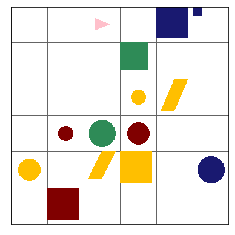

action: ['walk', 'walk', 'turn right', 'walk', 'walk']


In [3]:
example = ReaSCAN_data_json["examples"]["train"][random.randint(0, len(ReaSCAN_data_json["examples"]["train"])-1)]
command = example["command"]
print(f"command: {command}")
situation = example["situation"]
world = World(grid_size=6, colors=vocabulary.get_semantic_colors(),
              object_vocabulary=object_vocabulary,
              shapes=vocabulary.get_semantic_shapes(),
              save_directory="./tmp/")
world.clear_situation()
for obj_idx, obj in situation["placed_objects"].items():
    world.place_object(
        Object(size=int(obj["object"]["size"]), color=obj["object"]["color"], shape=obj["object"]["shape"]), 
        position=Position(row=int(obj["position"]["row"]), column=int(obj["position"]["column"]))
    )
world.place_agent_at(
    Position(
        row=int(situation["agent_position"]["row"]), 
        column=int(situation["agent_position"]["column"])
))
_ = world.render_simple()

# HERE: you can change to other target object.
target_position = Position(
    row=int(situation['target_object']['position']["row"]), 
    column=int(situation['target_object']['position']["column"])
)
world.go_to_position(position=target_position, manner='', primitive_command="walk")
target_commands, target_demonstration = world.get_current_observations()
print(f"action: {target_commands}")